 ### Assignment 4: CLASSIFICATION - Decision Trees.


### Import all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import copy
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
# calculate accuracy measures and confusion matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
# For Visualizing plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from IPython.display import Image

### Let's import the data

In [2]:
police = pd.read_csv("/Users/virensasalu/Documents/coding/UOA Coding Files/Course 2/download.csv")
police.head()

id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

### Let's Understand the data

In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4478 non-null   int64  
 1   name                     4478 non-null   object 
 2   date                     4478 non-null   object 
 3   manner_of_death          4478 non-null   object 
 4   armed                    4230 non-null   object 
 5   age                      4309 non-null   float64
 6   gender                   4473 non-null   object 
 7   race                     4105 non-null   object 
 8   city                     4478 non-null   object 
 9   state                    4478 non-null   object 
 10  signs_of_mental_illness  4478 non-null   bool   
 11  threat_level             4478 non-null   object 
 12  flee                     4299 non-null   object 
 13  body_camera              4478 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
police.describe()

id          age
count  4478.000000  4309.000000
mean   2502.721974    36.879322
std    1404.978671    13.067598
min       3.000000     6.000000
25%    1286.250000    27.000000
50%    2505.500000    35.000000
75%    3718.750000    45.000000
max    4927.000000    91.000000

In [5]:
police.describe(include='object').T

count unique          top  freq
name             4478   4332        TK TK   129
date             4478   1551   2018-06-29     9
manner_of_death  4478      2         shot  4250
armed            4230     84          gun  2489
gender           4473      2            M  4265
race             4105      6            W  2059
city             4478   2168      Phoenix    68
state            4478     51           CA   680
threat_level     4478      3       attack  2829
flee             4299      4  Not fleeing  2868

### Question 1: 1 Mark
**Display the percentage of missing values present in each column of the data and round it off to 2 decimal place.**

In [6]:
RoundedArmed = round(police['armed'].isnull().sum() / len(police['armed'])* 100, 2)
RoundedAge = round(police['age'].isnull().sum() / len(police['age'])* 100, 2)
RoundedRace = round(police['race'].isnull().sum() / len(police['race'])* 100, 2)
RoundedFlee = round(police['flee'].isnull().sum() / len(police['flee'])* 100, 2)
RoundedGender = round(police['gender'].isnull().sum() / len(police['gender'])* 100, 2)

print(f'Missing values in Armed column is: {RoundedArmed}% ')
print(f'Missing values in Age column is: {RoundedAge}% ')
print(f'Missing values in Race column is: {RoundedRace}% ')
print(f'Missing values in Flee column is: {RoundedFlee}% ')
print(f'Missing values in Gender column is: {RoundedGender}% ')
# TODO: Code to fill: 

#= (police['A'].isnull().sum() / len(police['A'])) * 100

# 1. '<<__A__>>' --> Fill appropriate method for finding missing values along with functions such as sum or count to calculate percentage
# 2. '<<__B__>>' --> Fill appropriate method for finding missing values along with functions such as sum or count to calculate percentage

Missing values in Armed column is: 5.54% 
Missing values in Age column is: 3.77% 
Missing values in Race column is: 8.33% 
Missing values in Flee column is: 4.0% 
Missing values in Gender column is: 0.11% 


In [7]:
# So,how many total missing values do we have?
TotalCells = np.product(police.shape)
TotalMissing = police.isnull().sum().sum()

# percent of data that is missing
PercentMissing = (TotalMissing/TotalCells) * 100
print(f'Missing values in Police Database is: {PercentMissing}% ')

Missing values in Police Database is: 1.5536272570662923% 


### Let's clean the data

In [8]:
# Since we observe only 1.6% of null or missing values, let's drop those missing values.

# Remove all the rows that contain missing value
police = police.dropna()

In [9]:
police.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [10]:
# Drop redundant or not so useful columns for model building
police = police.drop(['id','date','city','name','state'], axis=1)

In [11]:
# We take a copy of our source data.
df = copy.deepcopy(police)
df.head()

manner_of_death       armed   age gender race  signs_of_mental_illness  \
0              shot         gun  53.0      M    A                     True   
1              shot         gun  47.0      M    W                    False   
2  shot and Tasered     unarmed  23.0      M    H                    False   
3              shot  toy weapon  32.0      M    W                     True   
4              shot    nail gun  39.0      M    H                    False   

  threat_level         flee  body_camera  
0       attack  Not fleeing        False  
1       attack  Not fleeing        False  
2        other  Not fleeing        False  
3       attack  Not fleeing        False  
4       attack  Not fleeing        False

### Encoding

### Question 2: 1 Mark

- convert the body_camera column to binary numbers. False = 0 and True = 1. Convert it's datatype to int.
- convert the gender column to binary numbers. Male = 1 and Female = 0. Convert it's datatype to int.
- convert the signs_of_mental_illness column to binary numbers. False = 0 and True = 1. Convert it's datatype to int.
- convert the manner_of_death column to binary numbers. shot = 0 and shot and Tasered = 1. Convert it's datatype to int.

In [12]:
le = preprocessing.LabelEncoder()    

df["body_camera"] = le.fit_transform(df["body_camera"])
df["gender"] = le.fit_transform(df["gender"])
df["signs_of_mental_illness"] = le.fit_transform(df["signs_of_mental_illness"])
df["manner_of_death"] = le.fit_transform(df["manner_of_death"])

df['manner_of_death'] = df['manner_of_death'].astype('int')


df['gender'] = df['gender'].astype('int')
df['signs_of_mental_illness'] =df['signs_of_mental_illness'].astype('int')
df['body_camera'] = df['body_camera'].astype('int')

In [13]:
df.head()

manner_of_death       armed   age  gender race  signs_of_mental_illness  \
0                0         gun  53.0       1    A                        1   
1                0         gun  47.0       1    W                        0   
2                1     unarmed  23.0       1    H                        0   
3                0  toy weapon  32.0       1    W                        1   
4                0    nail gun  39.0       1    H                        0   

  threat_level         flee  body_camera  
0       attack  Not fleeing            0  
1       attack  Not fleeing            0  
2        other  Not fleeing            0  
3       attack  Not fleeing            0  
4       attack  Not fleeing            0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3663 entries, 0 to 4477
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   manner_of_death          3663 non-null   int64  
 1   armed                    3663 non-null   object 
 2   age                      3663 non-null   float64
 3   gender                   3663 non-null   int64  
 4   race                     3663 non-null   object 
 5   signs_of_mental_illness  3663 non-null   int64  
 6   threat_level             3663 non-null   object 
 7   flee                     3663 non-null   object 
 8   body_camera              3663 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 286.2+ KB


In [15]:
CategoricalColumns = ['manner_of_death', 'armed', 'age', 'gender', 'race', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']

for ColumnName in CategoricalColumns:
    if df[ColumnName].dtype == 'object':
        df[ColumnName] = pd.Categorical(df[ColumnName]).codes

In [16]:
df.head()

manner_of_death  armed   age  gender  race  signs_of_mental_illness  \
0                0     30  53.0       1     0                        1   
1                0     30  47.0       1     5                        0   
2                1     75  23.0       1     2                        0   
3                0     74  32.0       1     5                        1   
4                0     53  39.0       1     2                        0   

   threat_level  flee  body_camera  
0             0     2            0  
1             0     2            0  
2             1     2            0  
3             0     2            0  
4             0     2            0

### Let's build our models

**We are going to build a Decision Tree model. In this model we are going to predict signs_of_mental_illness.**

### Question 3: 1 Mark

**Split the Independent and Dependent attributes seperately from the given datset and save those in X and y variables respectively.**

In [17]:
#Independent attributes
X = df.drop('signs_of_mental_illness', axis=1)
#Dependent attribute
y = df['signs_of_mental_illness']  

In [18]:
train_char_label = ['No', 'Yes']

### Question 4: 1 Mark
Split the data into train and test, with a train, test ratio of 80:20

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Question 5: 1 Mark
**Build a decision tree model using appropriate  class from sklearn library and fit that model on train data.**

In [20]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Question 6: 1 Mark
**Predict the above built model on test data.**

In [21]:
y_predict = dt_model.predict(x_test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [22]:
print(dt_model.score(x_train , y_train))
print(dt_model.score(x_test , y_test))

0.8955631399317406
0.7066848567530696


### Question 7: 1 Mark
**Print confusion matrix of test data**

In [23]:
print(confusion_matrix(y_test, y_predict))
contrast =confusion_matrix(y_test, y_predict)

[[475  64]
 [151  43]]


In [24]:
from IPython.display import Image  
from sklearn import tree
from os import system

decision_tree = open('decision_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= decision_tree , feature_names = list(x_train), class_names = list(train_char_label))
decision_tree.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                      Imp
manner_of_death  0.029752
armed            0.126989
age              0.502160
gender           0.035199
race             0.092088
threat_level     0.081629
flee             0.081847
body_camera      0.050337


In [25]:
!pip install graphviz
!dot -V
!dot -Tpng decision_tree.dot -o decision_tree.png

dot - graphviz version 9.0.0 (20230911.1827)


In [26]:
system("dot -Tpng decision_tree.dot -o decision_tree.png")
Image("decision_tree.png")

**We can see that tree is overgrown**

## Regularising (pruning) the Decision Tree

### Question 8: 1 Mark
**Build a pruned decision tree classifier model with criterion=entropy, max_depth=6, min_samples_split=3, min_samples_leaf=1 and fit it on train data.**

In [27]:
reg_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3, min_samples_leaf=1)
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=3)

In [28]:
credit_tree_regularized = open('credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))
credit_tree_regularized.close()

### Question 9: 1 Mark
**Display the feature importance of all the predictors from regularized or pruned decision tree model.**

In [32]:
 '''Print the feature importances of all the Independendent variables or predictors to know
 which attribute has contibuted most in predition.'''

FeatureImportances = dt_model.feature_importances_
FeatureImportanceDF = pd.DataFrame({'Feature': X.columns, 'Importance': FeatureImportances})
FeatureImportanceDF = FeatureImportanceDF.sort_values(by='Importance', ascending=False)

print(FeatureImportanceDF)

           Feature  Importance
2              age    0.502160
1            armed    0.126989
4             race    0.092088
6             flee    0.081847
5     threat_level    0.081629
7      body_camera    0.050337
3           gender    0.035199
0  manner_of_death    0.029752


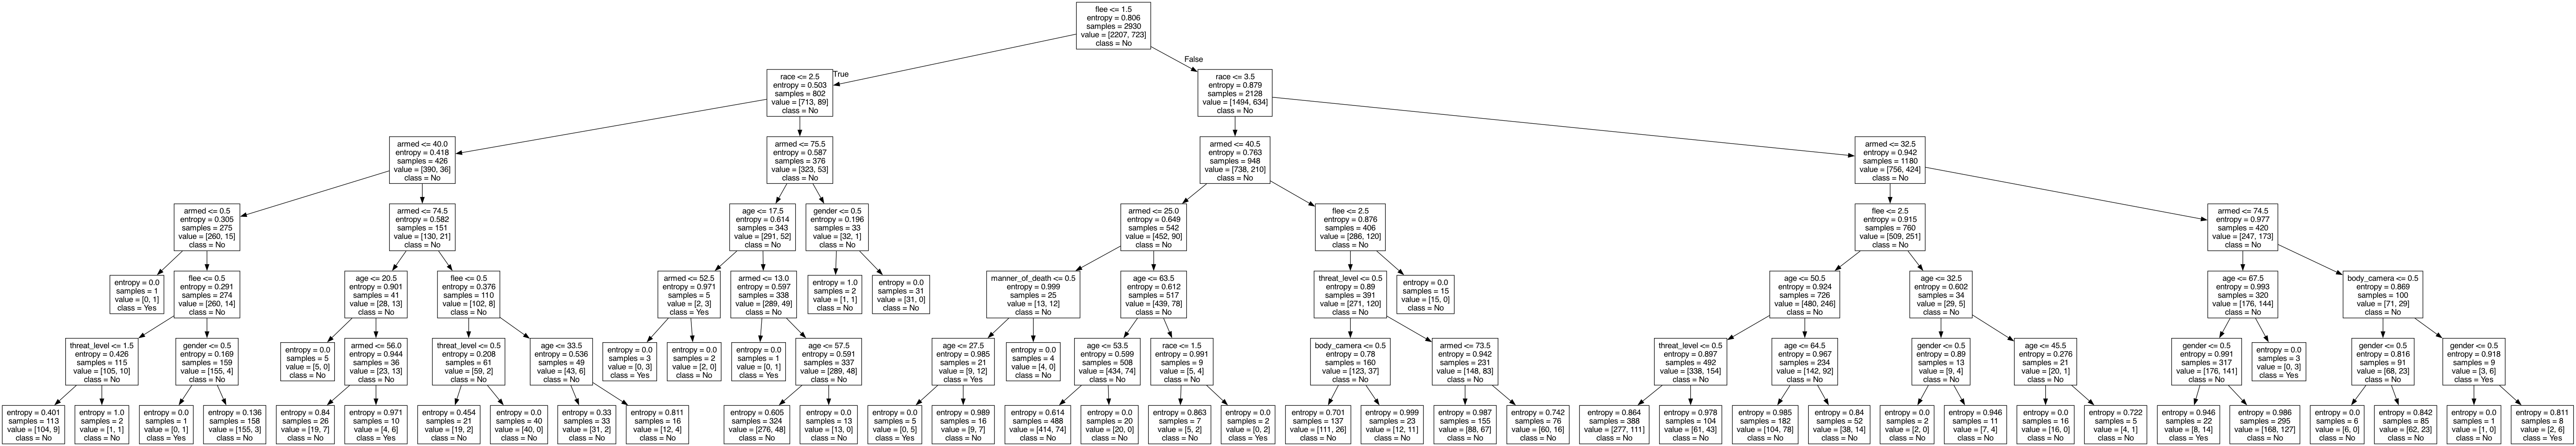

In [33]:
system("dot -Tpng credit_tree_regularized.dot -o credit_tree_regularized.png")
Image("credit_tree_regularized.png")

In [34]:
y_predict = reg_dt_model.predict(x_test)

### Question 10: 1 Mark
**Check the accuracy of both train and test data of regularized decision tree model.**

In [39]:
print(reg_dt_model.predict(x_train))
print(reg_dt_model.predict(x_test))

TrainPredictions = reg_dt_model.predict(x_train)
TestPredictions = reg_dt_model.predict(x_test)
TrainAccuracy = accuracy_score(y_train, TrainPredictions)
TestAccuracy = accuracy_score(y_test, TestPredictions)
print()
print("Train Accuracy:", TrainAccuracy)
print("Test Accuracy:", TestAccuracy)

[0 0 0 ... 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 

In [40]:
print(metrics.confusion_matrix(y_test, y_predict))
print(f'Before running the accuracy for both test and train data: \n {contrast}')

[[526  13]
 [190   4]]
Before running the accuracy for both test and train data: 
 [[475  64]
 [151  43]]


#### Though accuracy reduced in train, we can observe that model is a good model without overfitting and underfitting. Also accuracy of test data increased.